In [1]:
import math

from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "iris.data"

Đọc dữ liệu

In [3]:
x = np.genfromtxt(data_path, delimiter=",", usecols=(0, 1, 2, 3))

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Đọc nhãn các loại hoa

In [5]:
y = np.genfromtxt(data_path, delimiter=",", usecols=4, dtype=str)

In [6]:
y.tolist()

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


Tên các đặc trưng tương ứng

In [7]:
names = ["setal_length", "setal_width", "petal_length", "petal_width"]

Đặt màu tương ứng với các loại hoa

In [8]:
color_dict = {'Iris-setosa': "red", 'Iris-versicolor': "green", 'Iris-virginica': "blue"}

Vẽ biểu đồ scatter plot với từng cặp đặc trưng

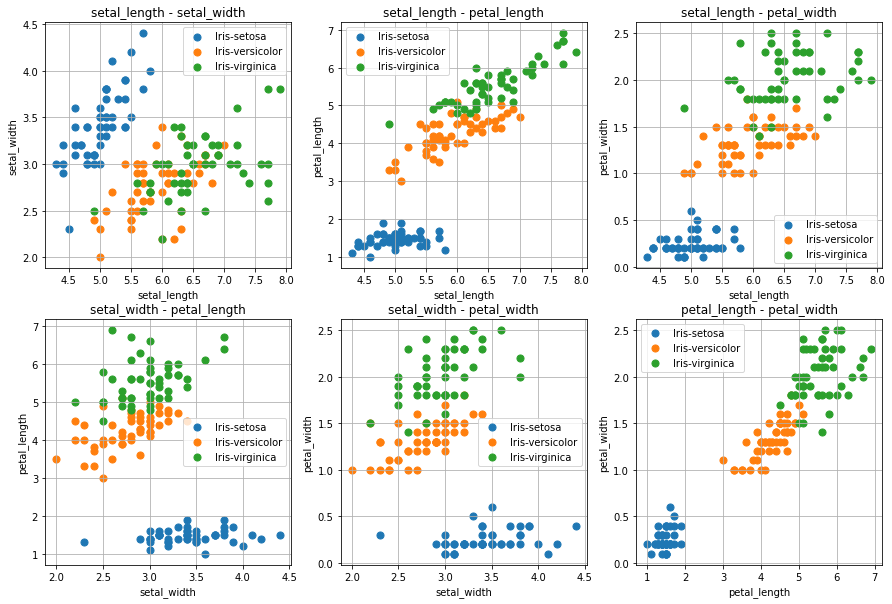

In [9]:
fig = plt.figure(figsize=(15, 10), facecolor='w')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
nums = len(list(combinations(range(x.shape[1]), r=2)))
cols = 3
rows = math.ceil(nums/cols)
i = 0

for couple in combinations(range(x.shape[1]), r=2):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title("{} - {}".format(names[couple[0]], names[couple[1]]))
    x_ax = x[:, couple[0]]
    y_ax = x[:, couple[1]]
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_ax[ix], y_ax[ix], label=g, s=50)

    ax.set_xlabel(names[couple[0]])
    ax.set_ylabel(names[couple[1]])
    ax.set_aspect(abs((x_ax.max() - x_ax.min())/(y_ax.max() - y_ax.min()))*1.0)
    ax.grid()
    ax.legend()
    i += 1

Tính $\bold{\mu}=\dfrac{1}{n}\sum_{i=1}^{n} \bold{x}_i$

In [10]:
mu = np.mean(x, axis=0, keepdims=True)

mu

array([[5.84333333, 3.054     , 3.75866667, 1.19866667]])

Tính $\bold{Z}=\bold{D} - 1.\bold{\mu}^T$

In [11]:
x_mu = x - mu

x_mu

array([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
        -9.98666667e-01],
       [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
        -9.98666667e-01],
       [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
        -9.98666667e-01],
       [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
        -7.98666667e-01],
       [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
        -8.98666667e-01],
       [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
        -1.09866667e+00],
       [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.04333333e+00,  3.46000000e-01, -2.15866667e+00,
      

In [12]:
np.dot(x_mu.T, x_mu) / x.shape[0]

array([[ 0.68112222, -0.03900667,  1.26519111,  0.51345778],
       [-0.03900667,  0.18675067, -0.319568  , -0.11719467],
       [ 1.26519111, -0.319568  ,  3.09242489,  1.28774489],
       [ 0.51345778, -0.11719467,  1.28774489,  0.57853156]])

In [13]:
np.matmul(x_mu.T, x_mu) / x.shape[0]

array([[ 0.68112222, -0.03900667,  1.26519111,  0.51345778],
       [-0.03900667,  0.18675067, -0.319568  , -0.11719467],
       [ 1.26519111, -0.319568  ,  3.09242489,  1.28774489],
       [ 0.51345778, -0.11719467,  1.28774489,  0.57853156]])

Tính $\Sigma = \dfrac{1}{n}\Big( \bold{Z}^T \bold{Z} \Big)$

In [14]:
cov_matrix = np.matmul(x_mu.T, x_mu) / x.shape[0]

Tính $(\lambda_1, \lambda_2, \dots, \lambda_v)=\mathrm{eigenvalues}(\Sigma)$ và $\bold{U}=\begin{pmatrix} \bold{u}_1, \bold{u}_2, \dots, \bold{u}_d \end{pmatrix}=\mathrm{eigenvectors}(\Sigma)$

In [15]:
w, v = np.linalg.eig(cov_matrix)


Sắp xếp lại các giá trị riêng theo chiều không tăng (thực ra không cần thiết vì numpy trả về các giá trị riêng đã được sắp xếp theo chiều không tăng)

In [16]:
order = np.argsort(w)[::-1]

In [17]:
w = w[order]

In [18]:
w

array([4.19667516, 0.24062861, 0.07800042, 0.02352514])

In [19]:
v = v[:, order]

In [20]:
v

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

Tính $f(r)=\dfrac{\sum_{i=1}^r \lambda_i}{\sum_{i=1}^d \lambda_i}, i=1,\dots, d$

In [21]:
rate = np.cumsum(w) / np.sum(w)

rate

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

Đặt $\alpha = 0.95$

In [22]:
alpha = 0.95

Chọn $r$ nhỏ nhất sao cho $f(r) \geq \alpha$

In [23]:
r = np.where(rate >= alpha)

In [24]:
r[0][0] + 1

2

Tính cơ sở $\bold{U}_r=\begin{pmatrix} \bold{u}_1, \bold{u}_2, \dots, \bold{u}_r \end{pmatrix}$

In [25]:
U = v[:, :(r[0][0] + 1)]

U

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

Tính dữ liệu đã được giảm chiều:

$$\bold{A}=\lbrace \bold{a}_i \vert \bold{a}_i = \bold{U}_r^T \bold{x}_i, i=1, \dots, n \rbrace$$

In [26]:
reduced_x = np.matmul(x, U)

In [27]:
reduced_x

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829],
       [ 3.23144574, -6.06250644],
       [ 2.69045242, -5.23261922],
       [ 2.8848611 , -5.48512908],
       [ 2.62338453, -4.7439257 ],
       [ 2.83749841, -5.20803203],
       [ 3.00481631, -5.96665874],
       [ 2.89820038, -5.33624436],
       [ 2.72390912, -5.08698354],
       [ 2.28614265, -4.81144382],
       [ 2.86779988, -6.50091863],
       [ 3.12747377, -6.65947808],
       [ 2.88881689, -6.13281341],
       [ 2.86302037, -5.6338604 ],
       [ 3.31226514, -6.19396782],
       [ 2.92399691, -5.83519737],
       [ 3.2008114 , -5.71259155],
       [ 2.96810819, -5.75475549],
       [ 2.2954854 , -5.4563393 ],
       [ 3.20821456, -5.42024641],
       [ 3.15517201, -5.28351414],
       [ 3.00342587, -5.17566739],
       [ 3.0422871 , -5.45261105],
       [ 2.94895215, -5.68940829],
       [ 2.87152183,

Biểu diễn dữ liệu sau khi đã được giảm chiều (vẽ scatterplot của đôi một các cặp trục được chọn sau phần tích thành phần chính)

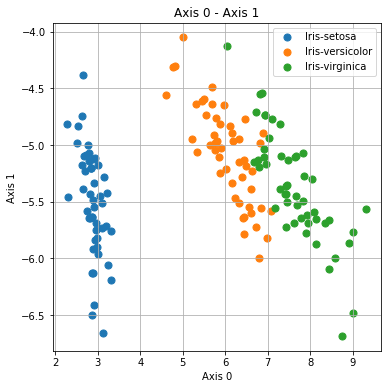

In [28]:
'''fix, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(reduced_x[:, 0][ix], reduced_x[:, 1][ix], c=color_dict[g], label=g, s=100)

ax.grid()
ax.legend()
plt.show()'''

fig = plt.figure(figsize=(20, 20), facecolor='w')
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
nums = len(list(combinations(range(reduced_x.shape[1]), r=2)))
cols = 3
rows = math.ceil(nums/cols)
i = 0

#fig, ax = plt.subplots(rows, cols)
for couple in combinations(range(reduced_x.shape[1]), r=2):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title("Axis {} - Axis {}".format(couple[0], couple[1]))
    x_ax = reduced_x[:, couple[0]]
    y_ax = reduced_x[:, couple[1]]
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_ax[ix], y_ax[ix], label=g, s=50)

    ax.set_xlabel("Axis {}".format(couple[0]))
    ax.set_ylabel("Axis {}".format(couple[1]))
    ax.set_aspect(abs((x_ax.max() - x_ax.min())/(y_ax.max() - y_ax.min()))*1.0)
    ax.grid()
    ax.legend()
    i += 1